## Start

https://drive.google.com/file/d/1AP00S-ufn5hSvMI9NjlKCwCFDUZPiO_i/view?usp=sharing

https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021

In [1]:
! gdown --id 1AP00S-ufn5hSvMI9NjlKCwCFDUZPiO_i

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1AP00S-ufn5hSvMI9NjlKCwCFDUZPiO_i
From (redirected): https://drive.google.com/uc?id=1AP00S-ufn5hSvMI9NjlKCwCFDUZPiO_i&confirm=t&uuid=eb9ad868-cbaa-4ad0-9c74-88a10298c9c5
To: /content/ru_real_est.csv
100% 891M/891M [00:14<00:00, 60.7MB/s]


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
import statsmodels.api as sm
from scipy import stats

In [3]:
df = pd.read_csv('/content/ru_real_est.csv', sep = ';')

#Cleaning the dataset

In [4]:
for col in df.columns:
  perc = df[col].isna().sum()
  print(col, ' = ', str(100*(perc/len(df))), '%')

date  =  0.0 %
price  =  0.0 %
level  =  0.0 %
levels  =  0.0 %
rooms  =  0.0 %
area  =  0.0 %
kitchen_area  =  0.0 %
geo_lat  =  0.0 %
geo_lon  =  0.0 %
building_type  =  0.0 %
object_type  =  0.0 %
postal_code  =  4.470543178246458 %
street_id  =  37.02675171572835 %
id_region  =  0.0 %
house_id  =  28.718963915778538 %


In [5]:
df.dropna(inplace = True)
df.isna().sum()

,0
date,0
price,0
level,0
levels,0
rooms,0
area,0
kitchen_area,0
geo_lat,0
geo_lon,0
building_type,0


In [6]:
df = df[df['building_type'] != 0]
df.head()
print(len(df))

2954337


In [7]:
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0
5,2021-01-01,1450000,5,5,2,47.0,6.0,48.511172,44.566846,2,0,400096.0,260588.0,34,1009994.0
6,2021-01-01,9000000,2,4,3,107.4,21.3,55.009914,82.934859,4,0,630102.0,233285.0,54,2823596.0
8,2021-01-01,2300000,16,18,1,39.7,11.5,45.003869,39.086511,4,0,350065.0,523822.0,23,1284243.0


In [8]:
df['price'].describe()

,price
count,2.954337e+06
mean,6.182223e+06
std,8.375720e+07
min,0.000000e+00
25%,2.448685e+06
50%,3.600000e+06
75%,5.700000e+06
max,1.250000e+11


In [9]:
low_cutoff = df['price'].quantile(0.05)
df = df[df['price'] >= low_cutoff]
df = df[df['area'] >= 10]

In [10]:
def millions(x, pos):
    return f'{int(x/1e6)}M'

In [11]:
street_avg_price = df.groupby('street_id')['price'].mean().reset_index()
street_avg_price.columns = ['street_id', 'street_avg_price']

df = df.merge(street_avg_price, on='street_id', how='left')

In [12]:
df['price_per_m2'] = df['price']/df['area']

# Graphics

In [13]:
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id,street_avg_price,price_per_m2
0,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0,8.184119e+06,125882.352941
1,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0,2.461174e+06,83333.333333
2,2021-01-01,1450000,5,5,2,47.0,6.0,48.511172,44.566846,2,0,400096.0,260588.0,34,1009994.0,1.844357e+06,30851.063830
3,2021-01-01,9000000,2,4,3,107.4,21.3,55.009914,82.934859,4,0,630102.0,233285.0,54,2823596.0,5.616065e+06,83798.882682
4,2021-01-01,2300000,16,18,1,39.7,11.5,45.003869,39.086511,4,0,350065.0,523822.0,23,1284243.0,3.350688e+06,57934.508816


object type:
  
  0 - Secondary real estate market;

  2 - New building.

building type:
  
  1 - Other
  
  2 - Panel
  
  3 - Monolithic
  
  4 - Brick
  
  5 - Blocky
  
  6 - Wooden

In rooms: "-1" = apartment

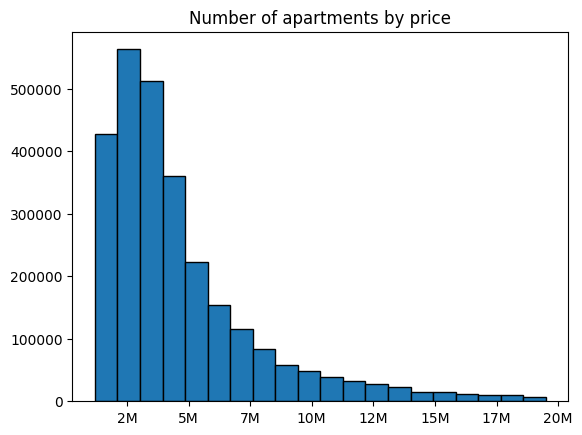

In [78]:
upper_limitation = df['price'].quantile(0.97)
dff = df[df['price'] < upper_limitation]

plt.hist(dff['price'], bins=20, edgecolor='black')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.title('Number of apartments by price')
plt.show()

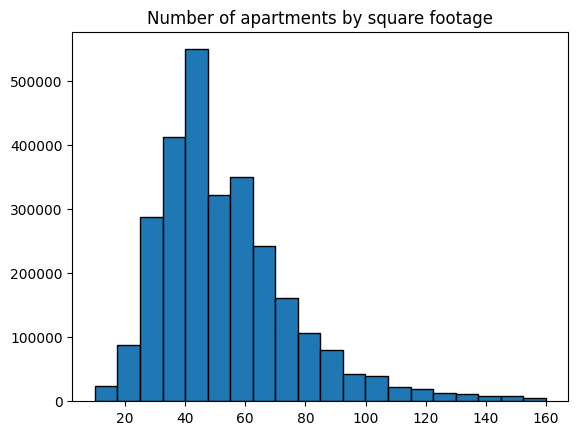

In [80]:
upper_limitation = df['area'].quantile(0.99)
dff = df[df['area'] < upper_limitation]

plt.hist(dff['area'], bins=20, edgecolor='black')
plt.title('Number of apartments by square footage')
plt.show()

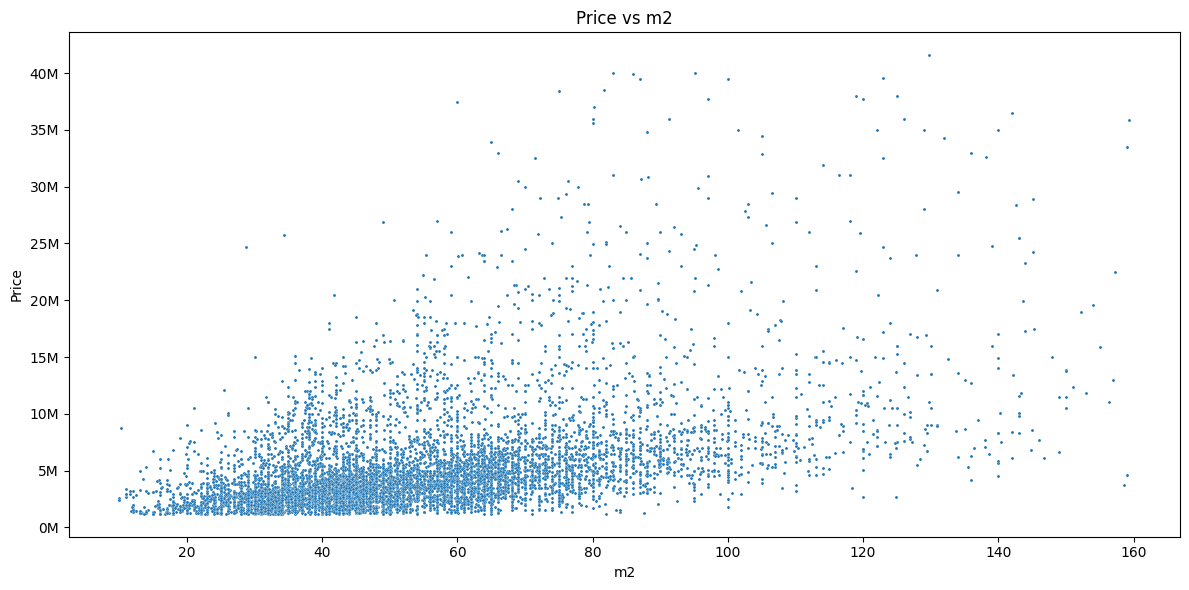

In [79]:
upper_limitation = df['price'].quantile(0.99)
dff = df[df['price'] < upper_limitation]
upper_limitation = df['area'].quantile(0.99)
dff = dff[dff['area'] < upper_limitation]
dff = dff.sample(10000)
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(dff, x='area', y='price', s = 5)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_xlabel('m2')
ax.set_ylabel('Price')
ax.set_title('Price vs m2')
plt.tight_layout()
plt.show()

In [17]:
df_sample = df.sample(10000)
fig = px.scatter_mapbox(df_sample,
                        lat=df_sample['geo_lat'],
                        lon=df_sample['geo_lon'],
                        hover_data = {'id_region': True},
                        zoom=3,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

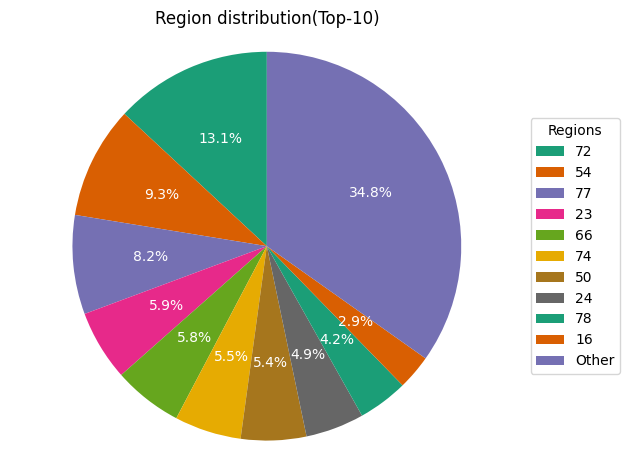

In [81]:
region_count = df['id_region'].value_counts()
top = region_count.head(10)
other = region_count[10:].sum()
type_counts = pd.concat([top, pd.Series({'Other': other})])

colors = plt.get_cmap("Dark2").colors[:len(type_counts)]
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    type_counts,
    colors = colors,
    startangle=90,
    autopct='%1.1f%%',
    textprops=dict(color="white")
)

ax.legend(
    wedges,
    type_counts.index,
    title="Regions",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Region distribution(Top-10)")
plt.axis('equal')
plt.tight_layout()
plt.show()

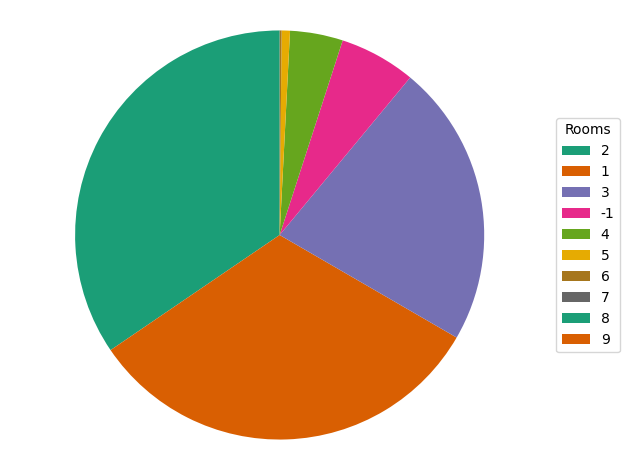

In [82]:
type_counts = df['rooms'].value_counts()

colors = plt.get_cmap("Dark2").colors[:len(type_counts)]

fig, ax = plt.subplots()
wedges, texts = ax.pie(
    type_counts,
    colors = colors,
    startangle=90
)

ax.legend(wedges, type_counts.index,
          title="Rooms",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()


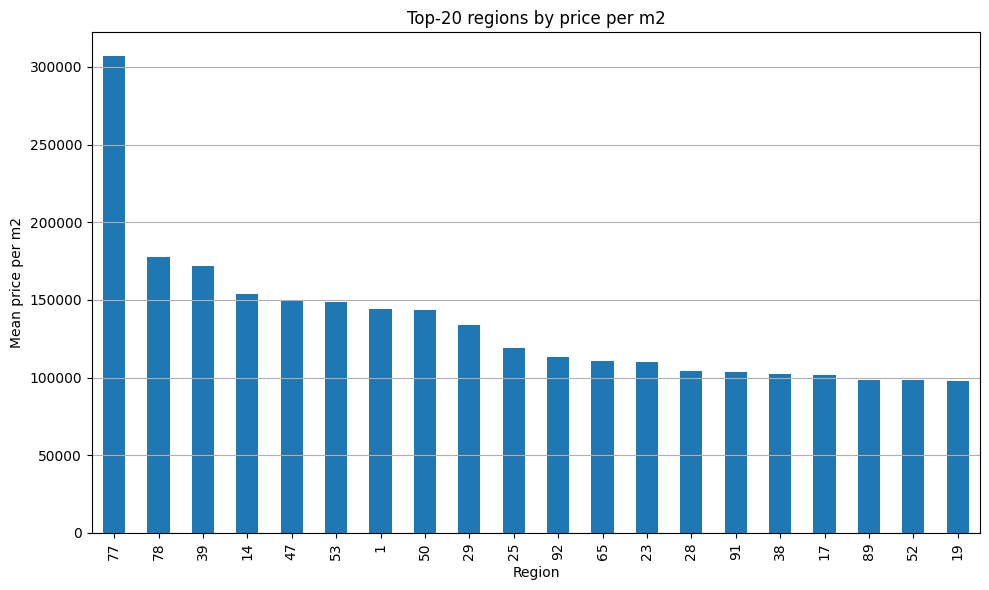

In [85]:
reg_mean = df.groupby('id_region')['price_per_m2'].mean().sort_values(ascending = False)
reg_mean = reg_mean.head(20)
fig, ax = plt.subplots(figsize=(10, 6))
reg_mean.plot(kind='bar', ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.xlabel('Region')
plt.ylabel('Mean price per m2')
plt.title('Top-20 regions by price per m2')
plt.tight_layout()
plt.show()

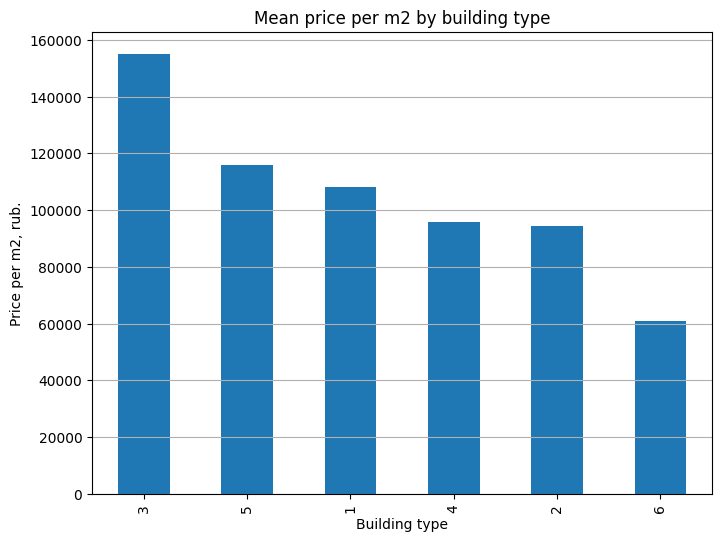

In [84]:
Ыtype_mean = df.groupby('building_type')['price_per_m2'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 6))
type_mean.plot(kind='bar', ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.xlabel('Building type')
plt.ylabel('Price per m2, rub.')
plt.title("Mean price per m2 by building type")
plt.show()

building type: | 1 - Other | 2 - Panel | 3 - Monolithic | 4 - Brick | 5 - Blocky | 6 - Wooden

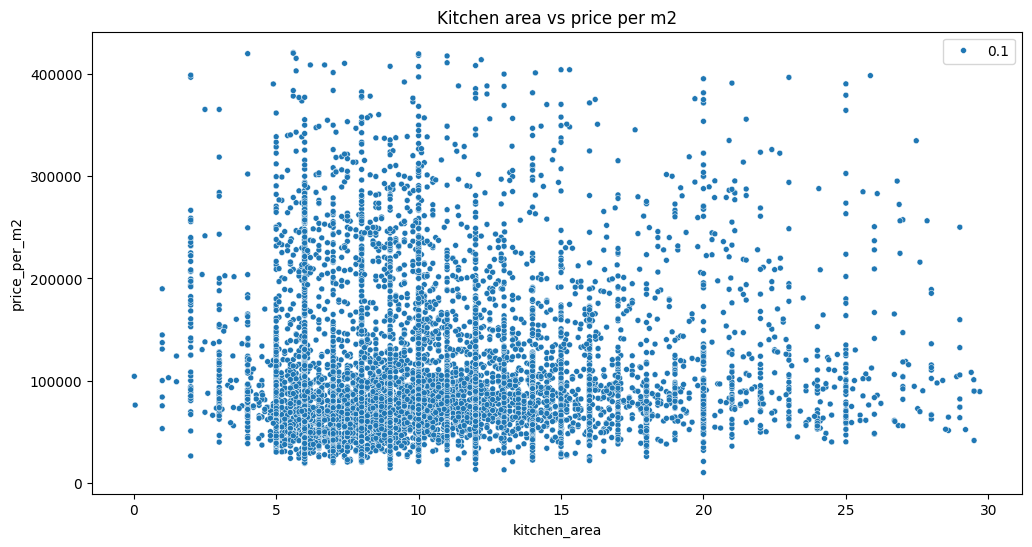

In [86]:
upper_limitation = df['price_per_m2'].quantile(0.99)
dff = df[df['price_per_m2'] < upper_limitation]
bottom_limitation = df['kitchen_area'].quantile(0.25)
upper_limitation = df['kitchen_area'].quantile(0.99)
dff = dff[dff['kitchen_area'] > bottom_limitation]
dff = dff[upper_limitation > dff['kitchen_area']]
dff = dff.sample(10000)
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(data=dff, x='kitchen_area', y='price_per_m2', size = 0.1)
plt.title("Kitchen area vs price per m2")
plt.show()

In [23]:
fig = px.scatter_mapbox(
    df.sample(10000),
    lat='geo_lat',
    lon='geo_lon',
    color='price_per_m2',
    size_max=5,
    zoom=4,
    height=600,
    mapbox_style='open-street-map',
    range_color=(0, 300000),
    hover_data=['price', 'area', 'rooms', 'id_region']
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

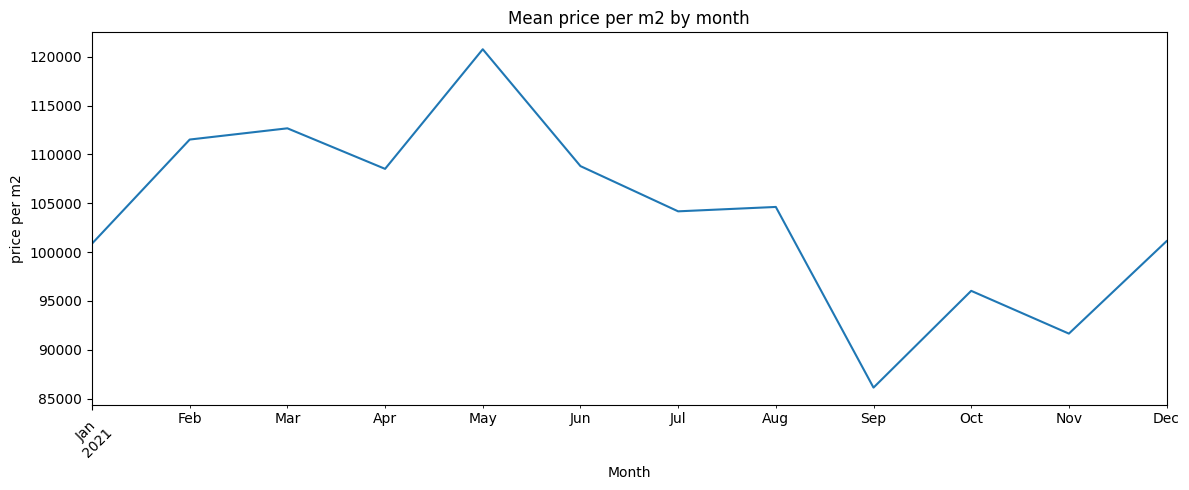

In [88]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
monthly = df.groupby('month')['price_per_m2'].mean()

monthly.plot(figsize=(12, 5))
plt.title("Mean price per m2 by month")
plt.ylabel("price per m2")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation

In [25]:
df_moscow = df[df['id_region'] == 77]
df_not_moscow = df[df['id_region'] != 77]

In [26]:
q90 = df_moscow['price'].quantile(0.90)
q05 = df_moscow['price'].quantile(0.05)
df_moscow = df_moscow[df_moscow['price'] <= q90]
df_moscow = df_moscow[df_moscow['price'] >= q05]

In [27]:
df_moscow['price'].describe()

,price
count,1.975120e+05
mean,1.480703e+07
std,7.744683e+06
min,4.450000e+06
25%,9.400000e+06
50%,1.250000e+07
75%,1.785000e+07
max,4.300000e+07


In [28]:
q95 = df_not_moscow['price'].quantile(0.95)
q05 = df_not_moscow['price'].quantile(0.05)
df_not_moscow = df_not_moscow[df_not_moscow['price'] <= q95]
df_not_moscow = df_not_moscow[df_not_moscow['price'] >= q05]

In [29]:
df_not_moscow['price'].describe()

,price
count,2.344254e+06
mean,3.967103e+06
std,1.834673e+06
min,1.500000e+06
25%,2.590000e+06
50%,3.550000e+06
75%,4.944000e+06
max,9.990000e+06


## Moscow

Distance from center

In [30]:
center_lat, center_lon = 55.7539, 37.6208

df_moscow.loc[:, 'distance_to_center'] = np.sqrt(
    (df_moscow['geo_lat'] - center_lat)**2 + (df_moscow['geo_lon'] - center_lon)**2
)

Clustering

In [31]:
coords = df_moscow[['geo_lat', 'geo_lon']]
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_moscow.loc[:, 'geo_cluster'] = kmeans.fit_predict(coords)

Correlation

In [49]:
cols_spear = ['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat',
        'geo_lon', 'building_type', 'object_type', 'postal_code', 'street_id',
        'id_region', 'house_id', 'price_per_m2', 'geo_cluster', 'distance_to_center', 'street_avg_price']
corr_spear = df_moscow[cols_spear].corr(method='spearman')

cols_pears = ['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'price_per_m2', 'distance_to_center', 'street_avg_price']
corr_pears = df_moscow[cols_pears].corr(method='pearson')

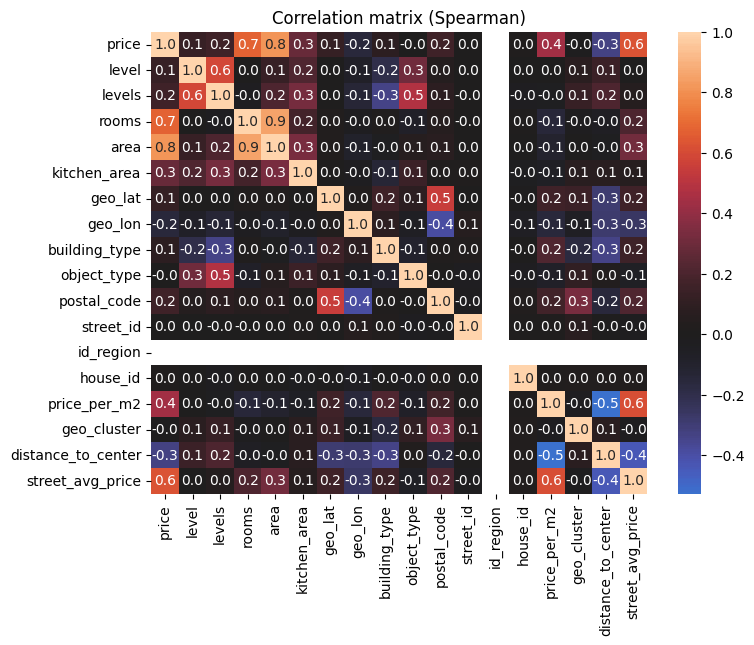

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_spear, annot=True, fmt='.1f',cmap='icefire', center=0)
plt.title('Correlation matrix (Spearman)')
plt.show()

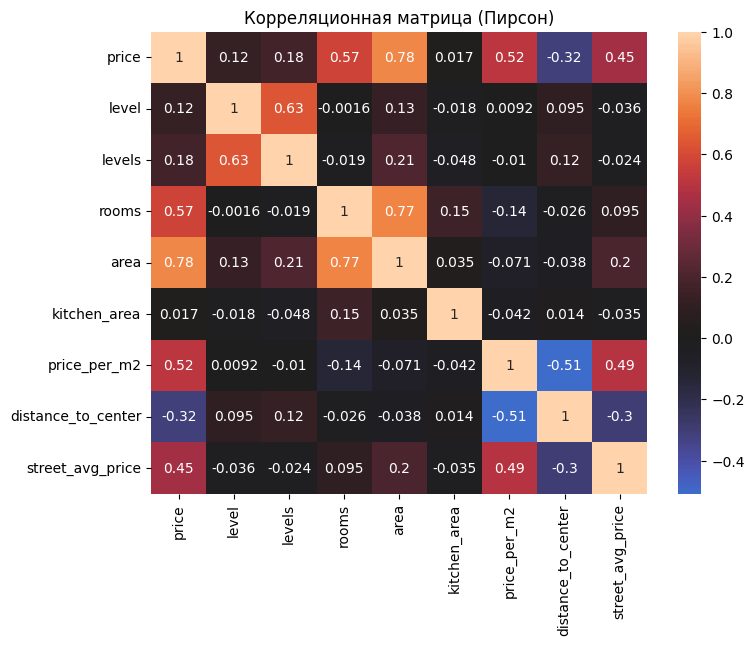

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pears, annot=True, cmap='icefire', center=0)
plt.title('Correlation matrix (Pearson)')
plt.show()

## Not Moscow

Correlation

In [35]:
cols_spear = ['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat',
        'geo_lon', 'building_type', 'object_type', 'postal_code', 'street_id',
        'id_region', 'house_id', 'price_per_m2']
corr_spear = df_not_moscow[cols_spear].corr(method='spearman')

cols_pears = ['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'price_per_m2']
corr_pears = df_not_moscow[cols_pears].corr(method='pearson')

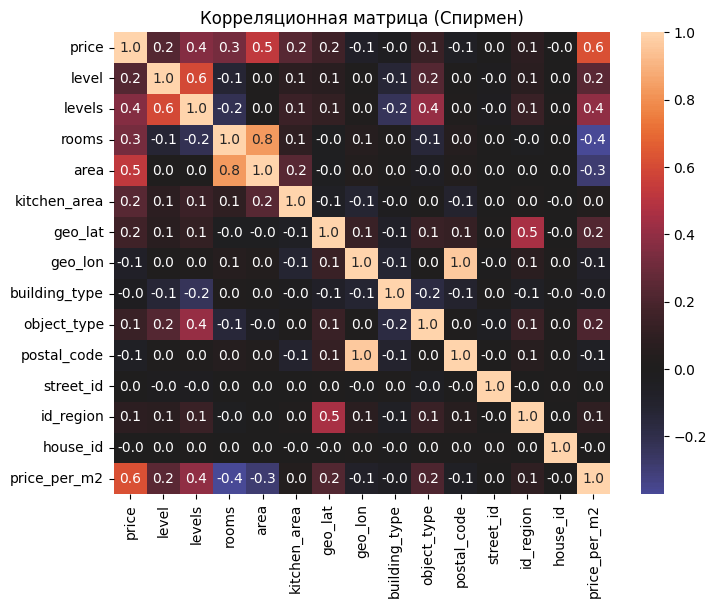

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_spear, annot=True, fmt='.1f',cmap='icefire', center=0)
plt.title('Correlation matrix (Spearman)')
plt.show()

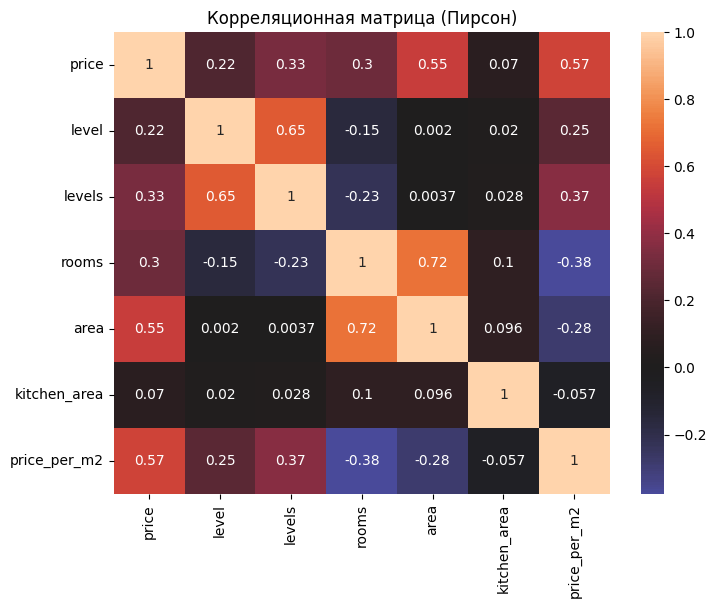

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pears, annot=True, cmap='icefire', center=0)
plt.title('Correlation matrix (Pearson)')
plt.show()

# Hypothesis check

## Hypothesis 1: The average street price significantly affects the cost of a particular property.

In [67]:
df_not_moscow['log_street_avg'] = np.log1p(df_not_moscow['street_avg_price'])
df_not_moscow['log_price'] = np.log1p(df_not_moscow['price'])

X_log = df_not_moscow[['log_street_avg']]
y_log = df_not_moscow['log_price']
X_log_const = sm.add_constant(X_log)
model_log = sm.OLS(y_log, X_log_const).fit()

print("=== Log-linear regression ===")
print(model_log.summary())


=== Лог-линейная регрессия: log(price) ~ log(street_avg_price) ===
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.782e+06
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:57:04   Log-Likelihood:            -7.6848e+05
No. Observations:             2344254   AIC:                         1.537e+06
Df Residuals:                 2344252   BIC:                         1.537e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

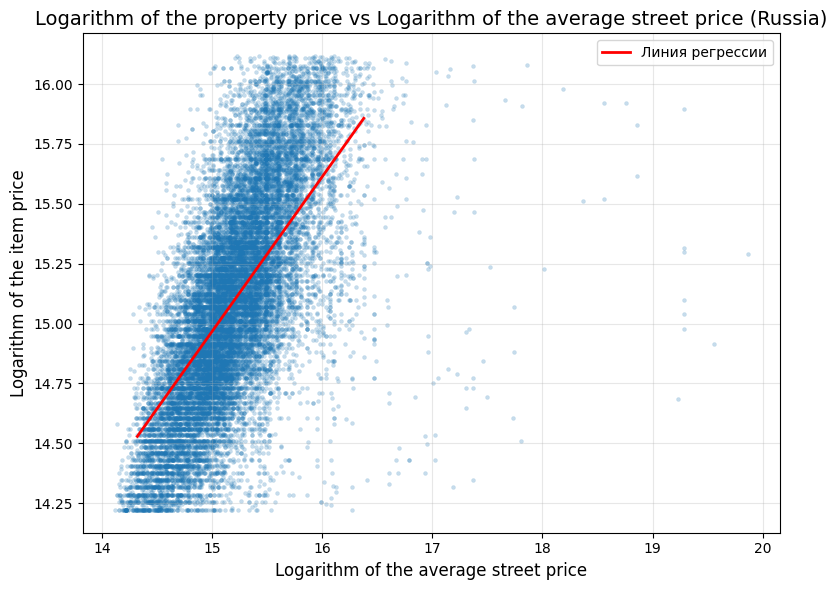

In [72]:
sample_df = df_not_moscow.sample(20000, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='log_street_avg',
    y='log_price',
    data=sample_df,
    s=8,
    alpha=0.25,
    color='tab:blue',
    edgecolor=None
)

x_min, x_max = np.percentile(df_not_moscow['log_street_avg'], [1, 99])
x_vals = np.linspace(x_min, x_max, 200)
coef_log = model_log.params['log_street_avg']
intercept_log = model_log.params['const']
y_vals = intercept_log + coef_log * x_vals

plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Линия регрессии')

plt.xlabel('Logarithm of the average street price', fontsize=12)
plt.ylabel('Logarithm of the item price', fontsize=12)
plt.title('Logarithm of the property price vs Logarithm of the average street price (Russia)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Conclusion: items on expensive streets are actually more expensive than similar items on cheaper streets.

## Hypothesis 2: The type of building has a significant impact on the price: monolithic houses are more expensive than panel ones.

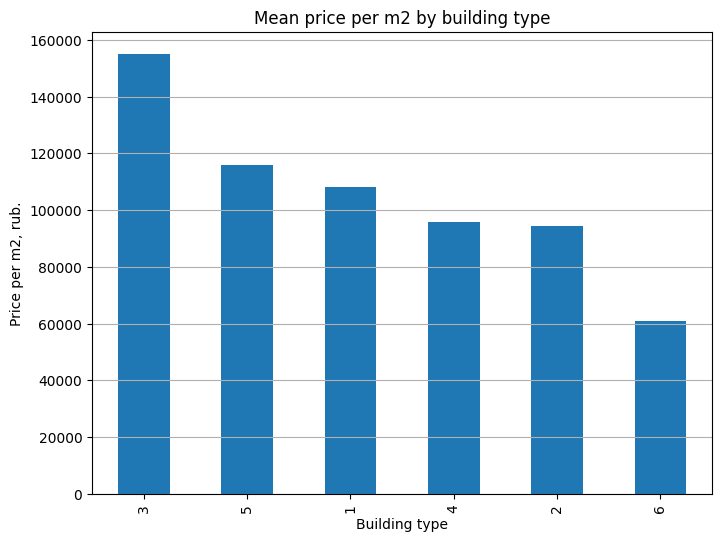

In [77]:
Ыtype_mean = df.groupby('building_type')['price_per_m2'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 6))
type_mean.plot(kind='bar', ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.xlabel('Building type')
plt.ylabel('Price per m2, rub.')
plt.title("Mean price per m2 by building type")
plt.show()

In [57]:
types = df_not_moscow['building_type'].unique()
groups = [
    df_not_moscow[df_not_moscow['building_type'] == t]['price_per_m2']
    for t in types
]
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nANOVA F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")


ANOVA F-statistic: 60978.8889, p-value: 0.0000e+00


Conclusion: the highest price per m2 — in brick houses, the lowest — in wooden ones. There are statistically significant differences between all major building types.

## Hypothesis 3: Apartments in new buildings are more expensive than the secondary market.

In [90]:
novostroyki = df_not_moscow[df_not_moscow['object_type'] == 2]['price_per_m2']
vtorichka  = df_not_moscow[df_not_moscow['object_type'] == 0]['price_per_m2']

q_upper_n = novostroyki.quantile(0.995)
q_upper_v = vtorichka.quantile(0.995)

nov_sample = novostroyki[novostroyki <= q_upper_n]
vt_sample  = vtorichka[vtorichka <= q_upper_v]

mean_n = novostroyki.mean()
se_n   = novostroyki.std() / np.sqrt(novostroyki.count())
mean_v = vtorichka.mean()
se_v   = vtorichka.std() / np.sqrt(vtorichka.count())

print(f"New buildings:      mean = {mean_n:.0f} ± {se_n:.0f} руб./м²")
print(f"Secondary market:  mean = {mean_v:.0f} ± {se_v:.0f} руб./м²")

u_stat, p_val_mw = stats.mannwhitneyu(novostroyki, vtorichka, alternative='two-sided')
print(f"Mann–Whitney U: statistic = {u_stat:.0f}, p-value = {p_val_mw:.4e}")

New buildings:      mean = 94796 ± 59 руб./м²
Secondary market:  mean = 76832 ± 23 руб./м²
Mann–Whitney U: statistic = 506565781234, p-value = 0.0000e+00


<ipython-input-74-be8c3e801400>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




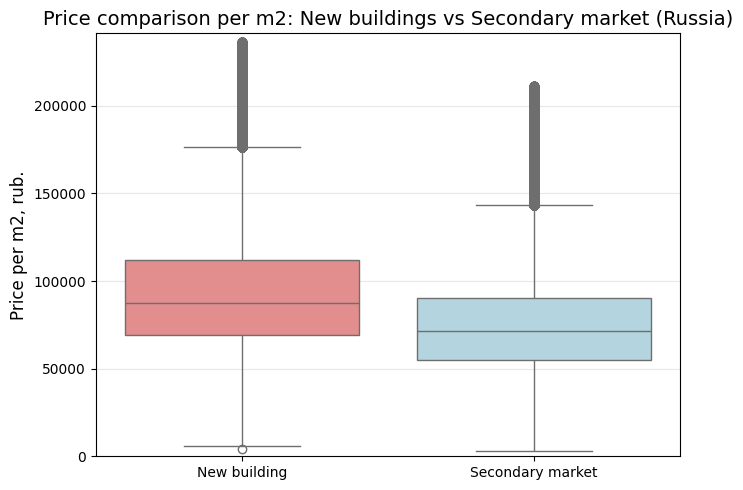

In [74]:
plt.figure(figsize=(7, 5))
sns.boxplot(
    data=pd.DataFrame({
        'price_per_m2': np.concatenate([nov_sample.values, vt_sample.values]),
        'Object type': ['New building'] * len(nov_sample) + ['Secondary market'] * len(vt_sample)
    }),
    x='Object type',
    y='price_per_m2',
    palette=['lightcoral', 'lightblue']
)
plt.ylim(0, max(q_upper_n, q_upper_v) * 1.02)
plt.xlabel('')
plt.ylabel('Price per m2, rub.', fontsize=12)
plt.title('Price comparison per m2: New buildings vs Secondary market (Russia)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Conclusion: new buildings on average cost significantly more than the secondary market. A difference of about 18,000 $ rub / m2 and a Mann-Whitney U-test result of p < 0.001 confirm this hypothesis.

# Linear Regression and XGBoost

Moscow

In [46]:
y = df_moscow['price']
X = df_moscow[['area', 'rooms', 'level', 'building_type', 'object_type', 'street_avg_price', 'geo_cluster', 'distance_to_center']]
X = pd.get_dummies(X, columns=['building_type', 'object_type', 'geo_cluster'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Basic model (Linear Regression)")
print("RMSE:", str(int(rmse_lr)))
print("MAE:", str(int(mae_lr)))

Basic model (Linear Regression)
RMSE: 3633084
MAE: 2411425


In [48]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("\nAdvanced model (XGBoost)")
print("RMSE:", str(int(rmse_xgb)))
print("MAE:", str(int(mae_xgb)))


Advanced model (XGBoost)
RMSE: 2409574
MAE: 1585628


Not Moscow

In [91]:
y = df_not_moscow['price']
X = df_not_moscow[['area', 'rooms', 'level', 'building_type', 'object_type',
        'id_region', 'street_avg_price']]
X = pd.get_dummies(X, columns=['building_type', 'object_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Basic model (Linear Regression)")
print("RMSE:", str(int(rmse_lr)))
print("MAE:", str(int(mae_lr)))

Basic model (Linear Regression)
RMSE: 1381043
MAE: 1005419


In [93]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("\nAdvanced model (XGBoost)")
print("RMSE:", str(int(rmse_xgb)))
print("MAE:", str(int(mae_xgb)))


Advanced model (XGBoost)
RMSE: 750114
MAE: 530922
